### `Window Functions: Rolling & Expanding Metrics`



#### `01: Rolling average air quality since 2010 for new york city`
We have already imported `pandas` as `pd` and `matplotlib.pyplot` as `plt`.

- Use `pd.read_csv()` to import `'ozone.csv'`, creating a `DateTimeIndex` from the `'date'` column using `parse_dates` and `index_col`, and assign the result to `data`.
- Add the columns `'90D'` and `'360D'` containing the 90 and 360 rolling calendar day `.mean()` for the column `'Ozone'`.
- Plot `data` starting 2010, setting `'New York City'` as title.

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6291 entries, 2000-01-01 to 2017-03-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ozone   6167 non-null   float64
dtypes: float64(1)
memory usage: 98.3 KB
None


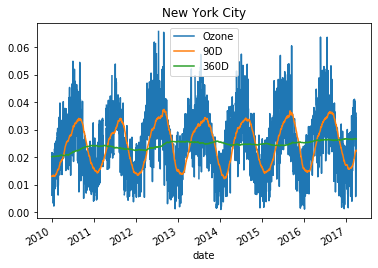

In [5]:
# Import and inspect ozone data here
data = pd.read_csv('datasets/ozone_nyc.csv', parse_dates=['date'], index_col='date')
print(data.info())

# Calculate 90d and 360d rolling mean for the last price
data['90D'] = data.Ozone.rolling(window='90D').mean()
data['360D'] = data.Ozone.rolling(window='360D').mean()

# Plot data
data.loc['2010':].plot()
plt.title('New York City')
plt.show()


#### `02: Rolling 360-day median & std. deviation for nyc ozone data since 2000`
The last video also showed you how to calculate several rolling statistics using the .agg() method, similar to .groupby().

Let's take a closer look at the air quality history of NYC using the Ozone data you have seen before. The daily data are very volatile, so using a longer term rolling average can help reveal a longer term trend.

You'll be using a 360 day rolling window, and .agg() to calculate the rolling mean and standard deviation for the daily average ozone values since 2000.


We have already imported `pandas` as `pd`, and `matplotlib.pyplot` as `plt`.

- Use `pd.read_csv()` to import `'ozone.csv'`, creating a DateTimeIndex from the `'date'` column using `parse_dates` and `index_col`, assign the result to `data`, and drop missing values using `.dropna()`.
- Select the `'Ozone'` column and create a `.rolling()` window using 360 periods, apply `.agg()` to calculate the `mean` and `std`, and assign this to `rolling_stats`.
- Use `.join()` to concatenate `data` with `rolling_stats`, and assign to `stats`.
- Plot `stats` using `subplots`.

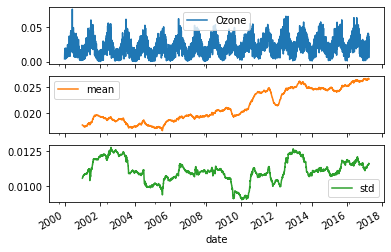

In [6]:
# Import and inspect ozone data here
data = pd.read_csv("datasets/ozone_nyc.csv", parse_dates=['date'], index_col='date').dropna()

# Calculate the rolling mean and std here
rolling_stats = data.Ozone.rolling(360).agg(['mean','std'])

# Join rolling_stats with ozone data
stats = data.join(rolling_stats)

# Plot stats
stats.plot(subplots=True)
plt.show()

Rolling quantiles for daily air quality in nyc
You learned in the last video how to calculate rolling quantiles to describe changes in the dispersion of a time series over time in a way that is less sensitive to outliers than using the mean and standard deviation.

Let's calculate rolling quantiles - at 10%, 50% (median) and 90% - of the distribution of daily average ozone concentration in NYC using a 360-day rolling window.

We have already imported `pandas` as `pd` and `matplotlib.pyplot` as `plt`. We have also loaded the ozone data from 2000-2017 into the variable `data`.

- Apply `.resample()` with daily frequency `'D'` to `data` and apply `.interpolate()` to fill missing values, and reassign to `data`.
- Inspect the result using `.info()`.
- Create a `.rolling() `window using 360 periods, select the column `'Ozone'`, and assign the result to `rolling`.
- Insert three new columns, `'q10'`, `'q50'` and `'q90'` into `data`, calculating the respective quantiles from `rolling`.
- Plot `data`.

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6300 entries, 2000-01-01 to 2017-03-31
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ozone   6300 non-null   float64
dtypes: float64(1)
memory usage: 98.4 KB


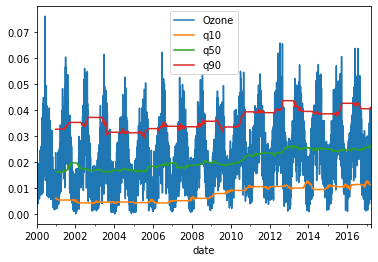

In [7]:
# Resample, interpolate and inspect ozone data here
data = data.resample('D').interpolate()
data.info()

# Create the rolling window
rolling = data.Ozone.rolling(360)

# Insert the rolling quantiles to the monthly returns
data['q10'] = rolling.quantile(0.1)
data['q50'] = rolling.quantile(0.5)
data['q90'] = rolling.quantile(0.9)

# Plot the data
data.plot()
plt.show()

#### `03: Cumulative sum vs .diff()`
In the video, you have learned about expanding windows that allow you to run cumulative calculations.

The cumulative sum method has in fact the opposite effect of the .diff() method that you came across in chapter 1.

To illustrate this, let's use the Google stock price time series, create the differences between prices, and reconstruct the series using the cumulative sum.


We have already imported `pandas` as `pd` and `matplotlib.pyplot` as `plt`. We have also loaded google stock prices into the variable `data`

- Apply `.diff()` to `data`, drop missing values, and assign the result to `differences`.
- Use `.first('D')` to select the first price from `data`, and assign it to `start_price`.
- Use `.append()` to combine `start_price` and `differences`, apply `.cumsum()` and assign this to `cumulative_sum`.
- Use `.equals()` to compare `data` and `cumulative_sum`, and print the result.

In [22]:
data = pd.read_csv("datasets/google.csv", parse_dates=['Date'], index_col='Date').dropna()
# Calculate differences
differences = data.diff().dropna()
start_price = data.first('D')
cumulative_sum = start_price.append(differences).cumsum()
# Validate cumulative sum equals data
print(data.equals(cumulative_sum))


True


#### `04: Cumulative return on $1,000 invested in google vs apple I`
To put your new ability to do cumulative return calculations to practical use, let's compare how much $1,000 would be worth if invested in Google (`'GOOG'`) or Apple (`'AAPL'`) in 2010.

We have already imported `pandas` as `pd`, and `matplotlib.pyplot` as `plt`. We have also loaded Google and Apple stock prices in a variable `data`.

- Define a variable `investment` with the value `1000`.
- Calculate `returns` by applying `.pct_change()` to `data`.
- Add 1 to `returns` and assign this to `returns_plus_one`, then apply `.cumprod()` to `returns_plus_one` and assign the result to `cumulative_return`.
- Multiply `cumulative_return` by `investment`, and plot the result.

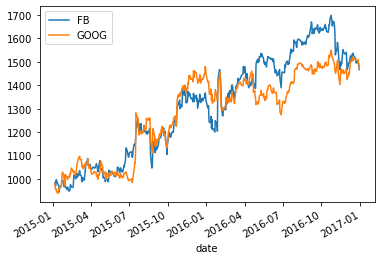

In [29]:
data = pd.read_csv("datasets/goog_fb.csv", parse_dates=['date'], index_col='date')
# Define your investment
investment = 1000

# Calculate the daily returns here
returns = data.pct_change()

# Calculate the cumulative returns here
returns_plus_one = returns.add(1)
cumulative_return = returns_plus_one.cumprod()

# Calculate and plot the investment return here 
cumulative_return.mul(investment).plot()
plt.show()


#### `05: Cumulative return on $1,000 invested in google vs apple II`
Apple outperformed Google over the entire period, but this may have been different over various 1-year sub periods, so that switching between the two stocks might have yielded an even better result.

To analyze this, calculate that cumulative return for rolling 1-year periods, and then plot the returns to see when each stock was superior.

We have already imported `pandas` as `pd` and `matplotlib.pyplot` as `plt`. We have also loaded the `GOOG` and `AAPL` close prices from the last exercise into `data`.

- Define a `multi_period_return()` function that returns the cumulative return from an array of period returns.
- Calculate `daily_returns` by applying `.pct_change()` to `data`.
- Create a `'360D'` `.rolling()` window on daily_returns, and `.apply()` `multi_period_returns`. Assign the result to `rolling_annual_returns`.
- Plot `rolling_annual_returns` after multiplying it by 100.

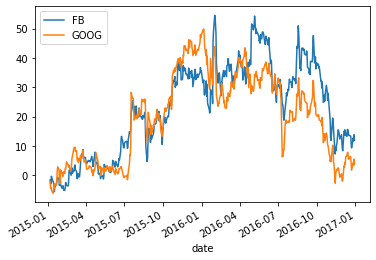

In [34]:
# Import numpy
import numpy as np
data = pd.read_csv("datasets/goog_fb.csv", parse_dates=['date'], index_col='date')

# Define a multi_period_return function
def multi_period_return(period_returns):
    return np.prod(period_returns + 1) - 1
    
# Calculate daily returns
daily_returns = data.pct_change()

# Calculate rolling_annual_returns
rolling_annual_returns = daily_returns.rolling('360D').apply(multi_period_return)

# Plot rolling_annual_returns
rolling_annual_returns.mul(100).plot()
plt.show()


#### `06:Random walk I`
In the last video, you have seen how to generate a random walk of returns, and how to convert this random return series into a random stock price path.

In this exercise, you'll build your own random walk by drawing random numbers from the normal distribution with the help of numpy.


We have already imported `pandas` as `pd`, functions `normal` and `seed` from `numpy.random`, and `matplotlib.pyplot` as `plt`.

- Set seed to 42.
- Use `normal` to generate 2,500 random returns with the parameters `loc=.001`, `scale=.01` and assign this to `random_walk`.
- Convert `random_walk` to a `pd.Series` object and reassign it to `random_walk`.
- Create `random_prices` by adding 1 to `random_walk` and calculating the cumulative product.
- Multiply `random_prices` by 1,000 and plot the result for a price series starting at 1,000.

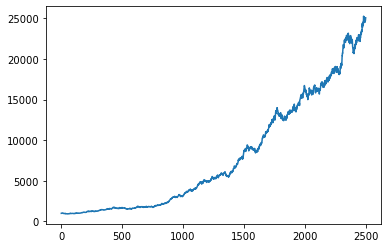

In [36]:
from numpy.random import normal, seed
# Set seed here
seed(42)

# Create random_walk
random_walk = normal(size=2500, loc=0.001, scale=0.01)

# Convert random_walk to pd.series
random_walk = pd.Series(random_walk)

# Create random_prices
random_prices = random_walk.add(1).cumprod()

# Plot random_prices here
random_prices.mul(1000).plot()
plt.show()



#### `07:Random walk II`
In the last video, you have also seen how to create a random walk of returns by sampling from actual returns, and how to use this random sample to create a random stock price path.

In this exercise, you'll build a random walk using historical returns from Facebook's stock price since IPO through the end of May 31, 2017. Then you'll simulate an alternative random price path in the next exercise.

We have already imported pandas as pd, choice and seed from numpy.random, seaborn as sns, and matplotlib.pyplot as plt. We have also imported the FB stock price series since IPO in May 2012 as the variable fb. Inspect this using .head().

- Set seed to 42.
- Apply `.pct_change()` to generate daily Facebook returns, drop missing values, and assign to `daily_returns`.
- Create a variable `n_obs` that contains the `.count()` of Facebook `daily_returns`.
- Use `choice()` to randomly select `n_obs` samples from `daily_returns`, and assign to random_walk.
- Convert `random_walk` to a `pd.Series` and reassign it to itself.
- Use `sns.distplot()` to plot the distribution of `random_walk`.

c:\Users\MOHAMAD\AppData\Local\Programs\Python\Python36\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


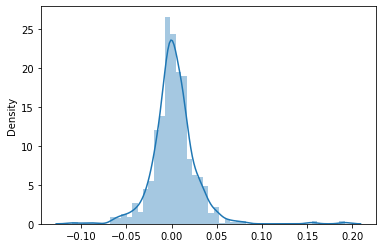

In [43]:
import seaborn as sns
from numpy.random import choice
df = pd.read_csv("datasets/fb.csv", parse_dates=True, index_col=0, header=None)
df.index.name = 'date'
df.columns = ['price']
fb = df['price']

# Set seed here
seed(42)

# Calculate daily_returns here
daily_returns = fb.pct_change().dropna()

# Get n_obs
n_obs = daily_returns.count()

# Create random_walk
random_walk = choice(daily_returns, size=n_obs)

# Convert random_walk to pd.series
random_walk = pd.Series(random_walk)

# Plot random_walk distribution
sns.distplot(random_walk)
plt.show()


#### `08: Random walk III`
In this exercise, you'll complete your random walk simulation using Facebook stock returns over the last five years. You'll start off with a random sample of returns like the one you've generated during the last exercise and use it to create a random stock price path.


We have already imported pandas as pd, choice and seed from numpy.random, and matplotlib.pyplot as plt. We have loaded the Facebook price as a pd.DataFrame in the variable fb and a random sample of daily FB returns as pd.Series in the variable random_walk.

- Select the first Facebook price by applying `.first('D')` to `fb.price`, and assign to `start`.
- Add 1 to `random_walk` and reassign it to itself, then `.append()` `random_walk` to `start` and assign this to `random_price`.
- Apply `.cumprod()` to `random_price` and reassign it to itself.
- Insert `random_price` as new column labeled `random` into `fb` and plot the result.

In [46]:
fb = pd.read_csv("datasets/fb.csv", parse_dates=True, index_col=0, header=None)
fb.index.name = 'date'
fb.columns = ['price']

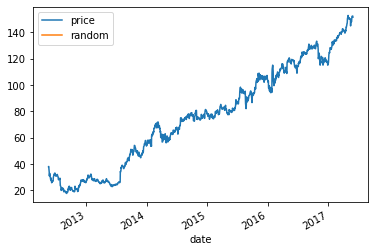

In [47]:
# Select fb start price here
start = fb.price.first('D')

# Add 1 to random walk and append to start
random_walk = random_walk.add(1)
random_price = start.append(random_walk)

# Calculate cumulative product here
random_price = random_price.cumprod()

# Insert into fb and plot
fb['random'] = random_price
fb.plot()
plt.show();

#### `09: Annual return correlations among several stocks`
You have seen in the video how to calculate correlations, and visualize the result.

In this exercise, we have provided you with the historical stock prices for Apple (AAPL), Amazon (AMZN), IBM (IBM), WalMart (WMT), and Exxon Mobile (XOM) for the last 4,000 trading days from July 2001 until the end of May 2017.

You'll calculate the year-end returns, the pairwise correlations among all stocks, and visualize the result as an annotated heatmap.

We have already imported `pandas` as `pd`, `seaborn` as `sns`, and `matplotlib.pyplot` as `plt`. We have loaded the daily close price for the five stocks in a variable called `data`.

- Inspect using `.info()`.
- Apply `.resample()` with year-end frequency (alias: `'A'`) to `data` and select the `.last()` price from each subperiod; assign this to `annual_prices`.
- Calculate `annual_returns` by applying `.pct_change()` to `annual_prices`.
- Calculate `correlations` by applying `.corr()` to `annual_returns` and print the result.
- Visualize `correlations` as an annotated `sns.heatmap()`.

In [52]:
# Import data here
data = pd.read_csv('datasets/5_stocks.csv', parse_dates=True, index_col=0).dropna()
data.head()

,AAPL,AMZN,IBM,WMT,XOM
Date,,,,,
2001-07-06,1.57,15.27,106.50,47.34,43.40
2001-07-09,1.62,15.81,104.72,48.25,43.36
2001-07-10,1.51,15.61,101.96,47.50,42.88
2001-07-11,1.61,15.34,103.85,48.85,42.48
2001-07-12,1.74,16.49,107.25,51.85,42.72


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3999 entries, 2001-07-06 to 2017-05-31
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    3999 non-null   float64
 1   AMZN    3999 non-null   float64
 2   IBM     3999 non-null   float64
 3   WMT     3999 non-null   float64
 4   XOM     3999 non-null   float64
dtypes: float64(5)
memory usage: 187.5 KB
None
          AAPL      AMZN       IBM       WMT       XOM
AAPL  1.000000  0.208731  0.460568 -0.183553  0.336413
AMZN  0.208731  1.000000  0.346407 -0.367620 -0.133965
IBM   0.460568  0.346407  1.000000  0.155445  0.367253
WMT  -0.183553 -0.367620  0.155445  1.000000  0.178833
XOM   0.336413 -0.133965  0.367253  0.178833  1.000000


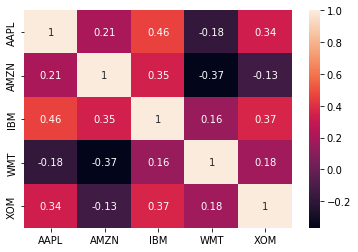

In [53]:
# Inspect data here
print(data.info())

# Calculate year-end prices here
annual_prices = data.resample('A').last()

# Calculate annual returns here
annual_returns = annual_prices.pct_change()

# Calculate and print the correlation matrix here
correlations = annual_returns.corr()
print(correlations)

# Visualize the correlations as heatmap here
sns.heatmap(correlations,annot=True)
plt.show()